<div align=center>
		
<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
    <br/>
<font color=#FF7500>
Sharif University of Technology - Departmenet of Computer Engineering
</font>
<p></p>
<font color=blue>
Artifical Intelligence - Dr. Mohammad Hossein Rohban
</font>
<br/>
<br/>
Fall 2021

</div>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Practical Assignment 3
            	<br/>
			</font>
    <br/>
    <br/>
<font size=4>
			<br/><br/>
Deadline: Azar 18th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Personal Data

In [1]:
# Set your student number
student_number = 98102284
Name = 'Parsa'
Last_Name = 'Mohammadian'

# Rules
- You are not allowed to add or remove cells. You **must use the provided space to write your code**. If you don't follow this rule, **your Practical Assignment won't be graded**. 
- There is one cell for your custom functions (if you need any) at the beginning of each question. Please note that this jupyter file might be broken down into 3 or 4 jupyter notebooks for easier grading, so you **must write your custom functions in the correct cell**.
- By running the cell below, you can see if your jupyter file is accepted or not. This cell will also **generate a python file which you'll have to upload to Quera** (as well as your jupyter file). The python file will later be validated and if the code in both files doesn't match, **your Practical Assignment won't be graded**.
- This assignment is due Azar 18th 23:59:59. you can use up to 10 grace days for this assignment and the hard deadline is Azar 28th 23:59:59.

In [2]:
# remember to save your jupyter file before running this script
from Helper_codes.validator import *

python_code = extract_python("./questions.ipynb")
with open(f'python_code_{student_number}.py', 'w') as file:
    file.write(python_code)

your jupyter file will be graded


# Q1 (30+5 Points)

<font size=4>
Author: Pooya Moini
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Bayesian Networks

In this programming assignment, we will investigate the structure of the binarized MNIST dataset of handwritten digits using Bayesian networks. The dataset contains images of handwritten digits with dimensions $28 \times 28$ (784) pixels. Consider the Bayesian network in Figure 1 . The network contains two layers of variables. The variables in the bottom layer, $X_{1: 784}$ denote the pixel values of the flattened image. The variables in the top layer, $Z_{1}$ and $Z_{2}$, are referred to as latent variables, because the value of these variables will not be explicitly provided by the data and will have to be inferred.

![Figure1](./Images/fig1.png)

The Bayesian network specifies a joint probability distribution over binary images and latent variables $p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$. The model is trained so that the marginal probability of the manifest variables, $p\left(x_{1: 784}\right)=\sum_{z_{1}, z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)$ is high on images that look like digits, and low for other images. 

For this programming assignment, we provide a pretrained model trained_mnist_model. The starter code loads this model and provides functions to directly access the conditional probability tables. Further, we simplify the problem by discretizing the latent and manifest variables such that $\operatorname{Val}\left(Z_{1}\right)=\operatorname{Val}\left(Z_{2}\right)=\{-3,-2.75, \ldots, 2.75,3\}$ and $\operatorname{Val}\left(X_{j}\right)=\{0,1\}$, i.e., the image is binary.

### 1. 
How many values can the random vector $X_{1: 784}$ take, i.e., how many different $28 \times 28$ binary images are there?

How many parameters would you need to specify an arbitrary probability distribution over all possible $28 \times 28$ binary images? (5 points)

In [8]:
# Write here
possible_images_count = 2 ** (28 * 28)
print(f'Possible images count: {possible_images_count}')
parameters_count = 2 ** (28 * 28)
print(f'Parameters count: {parameters_count}')

Possible images count: 101745825697019260773923519755878567461315282017759829107608914364075275235254395622580447400994175578963163918967182013639660669771108475957692810857098847138903161308502419410142185759152435680068435915159402496058513611411689167650816
Parameters count: 101745825697019260773923519755878567461315282017759829107608914364075275235254395622580447400994175578963163918967182013639660669771108475957692810857098847138903161308502419410142185759152435680068435915159402496058513611411689167650816


In [ ]:
# extra space

Run below codes to load the network and its functions.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
from scipy.io import loadmat


NUM_PIXELS = 28*28

In [6]:
def get_p_z1(z1_val):
    '''
    Helper. Computes the prior probability for variable z1 to take value z1_val.
    P(Z1=z1_val)
    '''

    return bayes_net['prior_z1'][z1_val]


def get_p_z2(z2_val):
    '''
    Helper. Computes the prior probability for variable z2 to take value z2_val.
    P(Z2=z2_val)
    '''

    return bayes_net['prior_z2'][z2_val]


In [7]:
def get_p_xk_cond_z1_z2(z1_val, z2_val, k):
    '''
    Helper. Computes the conditional probability that variable xk assumes value 1
    given that z1 assumes value z1_val and z2 assumes value z2_val
    P(Xk = 1 | Z1=z1_val , Z2=z2_val)
    '''

    return bayes_net['cond_likelihood'][(z1_val, z2_val)][0, k-1]


def get_p_x_cond_z1_z2(z1_val, z2_val):
    '''
    Computes the conditional probability of the entire vector x for x = 1,
    given that z1 assumes value z1_val and z2 assumes value z2_val
    '''
    pk = np.zeros(NUM_PIXELS)
    for i in range(NUM_PIXELS):
        pk[i] = get_p_xk_cond_z1_z2(z1_val, z2_val, i+1)
    return pk

In [9]:
def load_model(model_file):
    '''
    Loads a default Bayesian network with latent variables (in this case, a
    variational autoencoder)
    '''

    with open('Helper_codes/trained_mnist_model', 'rb') as infile:
        cpts = pkl.load(infile, encoding='bytes')

    model = {}
    model['prior_z1'] = cpts[0]
    model['prior_z2'] = cpts[1]
    model['cond_likelihood'] = cpts[2]

    return model

In [10]:
global disc_z1, disc_z2
n_disc_z = 25
disc_z1 = np.linspace(-3, 3, n_disc_z)
disc_z2 = np.linspace(-3, 3, n_disc_z)

global bayes_net
bayes_net = load_model('Helper_codes/trained_mnist_model')

### 2.
Produce 5 samples from the joint probability distribution $\left(z_{1}, z_{2}, x_{1: 784}\right) \sim p\left(Z_{1}, Z_{2}, X_{1: 784}\right)$, and plot the corresponding images (values of the pixel variables). (7 points)

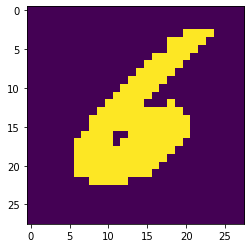

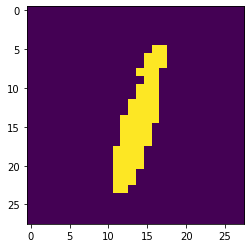

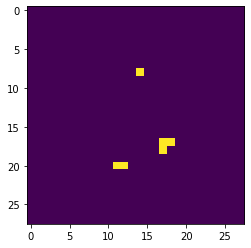

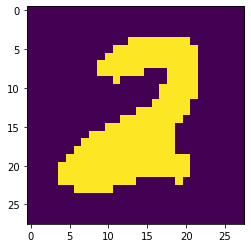

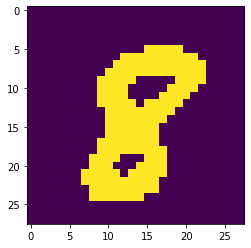

In [53]:
# write here
def binarize(x):
    return (x > np.random.rand()).astype(int)


def sample():
    z1 = np.random.choice(disc_z1, p=np.vectorize(get_p_z1)(disc_z1))
    z2 = np.random.choice(disc_z2, p=np.vectorize(get_p_z2)(disc_z2))
    x = get_p_x_cond_z1_z2(z1, z2)
    return binarize(x)


for _ in range(5):
    x = sample()
    plt.imshow(x.reshape(28, 28))
    plt.show()


In [ ]:
# extra space

### 3.

For each possible value of
$$
\left(\bar{z}_{1}, \bar{z}_{2}\right) \in\{-3,-2.75, \ldots, 2.75,3\} \times\{-3,-2.75, \ldots, 2.75,3\}
$$
compute the conditional expectation $E\left[X_{1: 784} \mid Z_{1}, Z_{2}=\left(\bar{z}_{1}, \bar{z}_{2}\right)\right] .$ This is the expected image corresponding to each possible value of the latent variables $Z_{1}, Z_{2} .$ Plot the images on on a $2 \mathrm{D}$ grid where the grid axes correspond to $Z_{1}$ and $Z_{2}$ respectively. What is the intuitive role of the $Z_{1}, Z_{2}$ variables in this model? (8 points)

In [ ]:
# write here
for z1 in disc_z1:
    for z2 in disc_z2:
        x = get_p_x_cond_z1_z2(z1, z2)
        plt.imshow(binarize(x).reshape(28, 28))
        plt.show()

In [ ]:
# extra space

In [ ]:
mat = loadmat('Helper_codes/testval.mat')
val_data = mat['val_x']
test_data = mat['test_x']

### 4.
You are given a validation and a test dataset. In the test dataset, some images are "real" handwritten digits, and some are anomalous (corrupted images). We would like to use our Bayesian network to distinguish real images from the anomalous ones. Intuitively, our Bayesian network should assign low probability to corrupted images and high probability to the real ones, and we can use this for classification. To do this, we first compute the average marginal log-likelihood,
$$
\log p\left(x_{1: 784}\right)=\log \sum_{z_{1}} \sum_{z_{2}} p\left(z_{1}, z_{2}, x_{1: 784}\right)
$$
on the validation dataset, and the standard deviation (again, standard deviation over the validation set). Consider a simple prediction rule where images with marginal log-likelihood, $\log p\left(x_{1: 784}\right)$, outside three standard deviations of the average marginal log-likelihood are classified as corrupted. Classify images in the test set as corrupted or real using this rule. Then plot a histogram of the marginal log-likelihood for the images classified as "real". Plot a separate histogram of the marginal log-likelihood for the images classified as "corrupted". (15 points)

In [ ]:
# write here

In [ ]:
# extra space

In [ ]:
# extra space

---

# Q2 (40 Points)

<font size=4>
Author: Mohammad Mahdi Asmae
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

# Sampling in Bayesian Network

In this assignment, we will implement diffrent methods of sampling and try to compare the methods by varying queries and number of samples. In the next section you will implement Bayesian Network as a Python class with these methods:

* CPT: returns conditional probability table of nodes
* PMF: returns probability mass function of given query
* Sampling: implementation of different sampling methods
    
We will use following BN in this problem.

<img src="Images/BN.png" width=1400 height=1200 />

In [4]:
############################################################
# import necessary packages in this cell                   #
# please set a random seed to get the same results in      #
# different runs (1 Points)                                #
############################################################
import random 

In [5]:
# extra space
random.seed(2820)

In [ ]:
# extra space

In [ ]:
class BN(object):
    """
    Bayesian Network implementation with sampling methods as a class
    
    Attributes
    ----------
    n: int
        number of variables
        
    G: dict
        Network representation as a dictionary. 
        {variable:[[children],[parents]]} # You can represent the network in other ways. This is only a suggestion.
    """
    
    def __init__(self) -> None:
        ############################################################
        # Initialzie Bayesian Network                              #
        # (1 Points)                                               #
        ############################################################
        
        #Your code
        self.n = 7
        self.G = {'A': [['b', 'c'], ['d']],}
    
    def cpt(self, node, value) -> dict:
        """
        This is a function that returns cpt of the given node
        
        Parameters
        ----------
        node:
            a variable in the bayes' net
            
        Returns
        -------
        result: dict
            {value1:{{parent1:p1_value1, parent2:p2_value1, ...}: prob1, ...}, value2: ...}
        """
        ############################################################
        # (3 Points)                                               #
        ############################################################
        
        #Your code
        pass
    
    def pmf(self, query, evidence) -> float:
        """
        This function gets a variable and its value as query and a list of evidences and returns probability mass function P(Q=q|E=e)
        
        Parameters
        ----------
        query:
            a variable and its value
            e.g. ('a', 1)
        evidence:
            list of variables and their values
            e.g. [('b', 0), ('c', 1)]
        
        Returns
        -------
        PMF: float
            P(query|evidence)
        """
        ############################################################
        # (3 Points)                                               #
        ############################################################
        
        #Your code
        pass
    
    def sampling(self, query, evidence, sampling_method, num_iter, num_burnin = 1e2) -> float:
        """
        Parameters
        ----------
        query: list
            list of variables an their values
            e.g. [('a', 0), ('e', 1)]
        evidence: list
            list of observed variables and their values
            e.g. [('b', 0), ('c', 1)]
        sampling_method:
            "Prior", "Rejection", "Likelihood Weighting", "Gibbs"
        num_iter:
            number of the generated samples 
        num_burnin:
            (used only in gibbs sampling) number of samples that we ignore at the start for gibbs method to converge
            
        Returns
        -------
        probability: float
            approximate P(query|evidence) calculated by sampling
        """
        ############################################################
        # (27 Points)                                              #
        #     Prior sampling (6 points)                            #
        #     Rejection sampling (6 points)                        #
        #     Likelihood weighting (7 points)                      #
        #     Gibbs sampling (8 points)                      #
        ############################################################
        
        #Your code
        pass
    
    

In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
# extra space

In this part you will compare sampling results with real probabilities for these settings:

* query: $P(F=1|A=1,E=0)$ , $P(C=0,B=1|F=1,D=0)$
* number of samples: 100, 500, 1000, 3000, 10000, 50000

First find the probabilities with inference methods, then find the approximate probabilities for the queries with sampling methods with different number of samples. At the end, you will plot errors of diffrent methods by number of samples.

In [ ]:
############################################################
# x-axis: number of samples                                #
# y-axis: error                                            #
# Your plot have to contain errors for all diffrent        #
# methods of sampling that you've implemented (3 Points)   #
############################################################

#Your code

In [ ]:
# extra space

In [ ]:
# extra space

For Gibbs sampling, try diffrent burnin values and report the accuracy (or error).

In [ ]:
############################################################
# (2 Points)                                         #
############################################################

#Your code

In [ ]:
# extra space

In [ ]:
# extra space

# Q3 (20+ 5 Points)

<font size=4>
Author: Kian Bakhtari
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## The Puerto Princesa ship

At midnight on a fall day in the Philippines, a ship leaves Puerto Princesa City's seaport to Macao, China. After one or two hours, the boat loses its GPS connection because of a technical issue. Captain keeps navigating the ship to its destination, using the stars and four old radio towers, which you can see on the map. Each antenna could measure the ship's coordinates (X, Y) and send them to its receiver. There are five records of towers signals at five different times, available for you in the records.json file. Also, the boat's actual coordinates are available in the real_coordinates.json file. The exact coordinates are ONLY FOR EVALUATION PURPOSES, and you CAN NOT use them as input data. The five dots on the map below are actual coordinates of the ship, at each time step where the records from antennas were received. Also, the map is decorative and is not part of the data.

![Figure3-1](./Images/map.png)

Each tower has a noise that is coming from a gaussian distribution, meaning that every (X, Y) pair that is received from an antenna is actually derived from:

X = sample_from_normal_distribution(mean = X_real, std = antenna's std)
Y = sample_from_normal_distribution(mean = Y_real, std = antenna's std)

Information of radio towers (coordinate and noise standard deviation) is available in the towers_info.json file.

The ship's movement between those five different time steps could be mathematically modeled as follows:
At each time step, the ship moves D units to the north and F units to either east or west (half of the times west, and half of the times east). D and F are both samples from exponential distributions with a scale of Y_STEP and X_STEP, respectively. Those parameters are available in the moving_model.json file.

### Hidden Markov Model

At this point, you can build a simple HMM and estimate the ship's coordinates using the conditional probabilities that you have. For each time step, calculate the ship's coordinates at that time step and previous time steps, using the tower records received up to that time. In simpler words, calculate:<br>

P(coor_0 | records_0)<br>
P(coor_1 | records_0, records_1)<br>
...<br>
P(coor_4 | records_0, records_1, records_2, records_3, records_4)<br>


The actual coordinates of the ship in the first time step (coor_0) is coming from a 2-dimensional guassian distribution with the mean of Puerto Princesa city's coordinates and covarianve matrix of INIT_COV (scalar) times the identity matrix. INIT_COV and coordinates of Puerto Princesa city is availabel in moving_model.json file.

## Libraries

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import json

from scipy.stats import norm, expon
import scipy
import pandas as pd

ModuleNotFoundError: No module named 'scipy'

## Data

In [ ]:
real_coordinates = json.load(open('./inputs/real_coordinates.json'))
pd.DataFrame(real_coordinates)

In [ ]:
towers_info = json.load(open('./inputs/towers_info.json'))
pd.DataFrame(towers_info)

In [ ]:
moving_model = json.load(open('./inputs/moving_model.json'))
moving_model

In [ ]:
records = json.load(open('./inputs/records.json'))
pd.DataFrame(records)

## Functions

In [ ]:
tower_records = [(records.get('Tower1')[i],
                  records.get('Tower2')[i], 
                  records.get('Tower3')[i], 
                  records.get('Tower4')[i]) for i in range(5)]

In [ ]:
tower_records

In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
def get_mean_towers_coor(time_step: int, tower_records: list):
    # The average of all four towers measurements at a given time step
    x = np.average([tower_coor[0] for tower_coor in tower_records[time_step]])
    y = np.average([tower_coor[1] for tower_coor in tower_records[time_step]])
    return x, y


def P_coor0(coor0):
    # Distribuiton of initial coordinates (time step 0)
    x0, y0 = coor0
    return scipy.stats.multivariate_normal.pdf([x0, y0], 
                            mean=moving_model.get('Peurto_coordinates'), cov=moving_model.get('INIT_COV'))


# filling these three functions with apropriate codes: (2 points)

def P_coor_given_prevCoor(coor, prev_coor):
    # Probability of coordinates at time step i, given the coordinates of time step i-1
    ############################################################
    #                                                          #
    #                    Your code here                        #
    #                                                          #
    #                                                          #
    ############################################################
    pass

    
def P_towerCoor_given_coor(tower_coor, tower_std, coor):
    # Probability of a tower measurement, given the coordinates of the ship
    ############################################################
    #                                                          #
    #                    Your code here                        #
    #                                                          #
    #                                                          #
    ############################################################
    pass
    
    
def P_record_given_coor(rec, coor, towers_info):
    # All four measurements of all four towers at time step i, is called the record of thime step i.
    # This function returns the probability of a record given the ship's coordinates.
    ############################################################
    #                                                          #
    #                    Your code here                        #
    #                                                          #
    #                                                          #
    ############################################################
    pass


In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
def real_coor(time_step):
    return round(real_coordinates.get('X')[time_step]), round(real_coordinates.get('Y')[time_step])

def dist(coor_a, coor_b):
    return round(np.sqrt((coor_a[0] - coor_b[0])**2 + (coor_a[1] - coor_b[1])**2))

coor0_estimations = []
coor1_estimations = []
coor2_estimations = []
coor3_estimations = []

#### Estimating coordinates_0 from P(coor_0) and record_0

In the cell below, you can see the approach for finding the argmax of P(coor_0 | record_0), which is equal to argmax of P(record_0 | coor_0) times P(coor_0).
We are not using derivatives to find the argmax, we are actually doing it numerically by trying different coordinates and seeing which one provides the highest probability. <br>

#### Recommended approach: You can use gradient descent to find the argmax of probability function, and that will give you 5 extra points.

In [ ]:
# argmax P(coor_0 | record_0) = argmax P(record_0 | coor_0) P(coor_0)

best_x0, best_y0 = None, None

max_Px, max_Py = 0, 0
interval, step = 30, 5
# Larger interval and smaller step will lead to a more accurate result, but will increase computational 
# complexity deramaticly. Feel free to use other approaches like running this cell more than once and tighten
# the searching interval with smaller steps. 
# Recommended approach: You can use gradient descent to find the argmax of probability
# function, and that will give you 5 extra points.

towers_mean_x0, towers_mean_y0 = get_mean_towers_coor(0, tower_records)

for x0 in range(int(towers_mean_x0 - interval), int(towers_mean_x0 + interval), step):
    for y0 in range(int(towers_mean_y0 - interval), int(towers_mean_y0 + interval), step):
        
        coor0 = (x0, y0)
        rec0 = tower_records[0]

        P_rec0_given_x0, P_rec0_given_y0 = P_record_given_coor(rec0, coor0, towers_info)
        p_c0 = P_coor0(coor0)
    
        Px = P_rec0_given_x0 * p_c0
        Py = P_rec0_given_y0 * p_c0

        if Px > max_Px:
            best_x0 = x0
            max_Px = Px

        if Py > max_Py:
            best_y0 = y0
            max_Py = Py


coor0_estimations.append((best_x0, best_y0))

In [ ]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')

#### Estimating coordinates_0 and coordinates_1 from P(coor_0), record_0, and record_1<br>(4 points)

In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
# argmax P(coor_0 | record_0, record_1)
# argmax P(coor_1 | coor_0, record_0, record_1)


max_Px, max_Py = 0, 0
interval, step = 20, 5

best_x0, best_y0 = None, None
best_x1, best_y1 = None, None

towers_mean_x1, towers_mean_y1 = get_mean_towers_coor(1, tower_records)

for x0 in range(int(coor0_estimations[-1][0] - interval), int(coor0_estimations[-1][0] + interval), step):
    for y0 in range(int(coor0_estimations[-1][1] - interval), int(coor0_estimations[-1][1] + interval), step):
        
         for x1 in range(int(towers_mean_x1 - interval), int(towers_mean_x1 + interval), step):
            for y1 in range(int(towers_mean_y1 - interval), int(towers_mean_y1 + interval), step):
                    
                coor0 = (x0, y0)
                coor1 = (x1, y1)

                rec0 = tower_records[0]
                rec1 = tower_records[1]

        # Similiar to the cell above, calculate the best estimation
        # of coordinates_0 and coordinates_1
        ############################################################
        #                                                          #
        #                    Your code here                        #
        #                                                          #
        #                                                          #
        ############################################################
                    
            
coor0_estimations.append((best_x0, best_y0))
coor1_estimations.append((best_x1, best_y1))

In [ ]:
# extra space

In [ ]:
# extra space

In [ ]:
print(f'real_coor0: {real_coor(0)} - Estimated_coor0: {best_x0, best_y0}')
print(f'Estimation_error: {dist((best_x0, best_y0), real_coor(0))}')
print()
print(f'real_coor1: {real_coor(1)} - Estimated_coor1: {best_x1, best_y1}')
print(f'Estimation_error: {dist((best_x1, best_y1), real_coor(1))}')

#### Estimating coordinates_0, coordinates_1 and coordinates_2 from P(coor_0), record_0, record_1, and record_2 <br> (4 points)

In [ ]:
############################################################
#                                                          #
#                    Your code here                        #
#                                                          #
#                                                          #
############################################################
                    

In [ ]:
# extra space

In [ ]:
# extra space

#### Estimating coordinates_0, coordinates_1, coordinates_2, and coordinates_3 from  P(coor_0), record_0, record_1, record_2, and record_3 <br> (4 points)

In [ ]:
############################################################
#                                                          #
#                    Your code here                        #
#                                                          #
#                                                          #
############################################################
                    

In [ ]:
# extra space

In [ ]:
# extra space

As you know from the theoretical aspect, and you can see from your results, the errors of estimations decrease when you use more records and conditional probabilities.

#### Plot curves that show using more records, leads to decrease of estimation error.<br>( 6 points)


In [ ]:
############################################################
#                                                          #
#                    Your code here                        #
#                                                          #
#                                                          #
############################################################

In [ ]:
# extra space

In [ ]:
# extra space